
# Project: Life Expectancy Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Life expectancy at birth has risen rapidly during the last century due to a number of factors, including reductions in infant mortality, rising living standards, improved lifestyles and better education, as well as advances in healthcare and medicine.

> This analysis  meant to find out what was the average life expectancy before, how did it grow during the years  and what are the projections for the future up until the end of the 21st century.  I don't intend to draw any correlation between this and other data sets, regarding infant mortality, education and healthcare because I don't think these can clearly be related (without further analysis).

> However, I'm planning to explore the data and find answers to the questions below:
> - What was the average life expectancy in the 1800s, 1900s, 1950s and 2000s? 
> - Which countries has the highest life expectancy data now?
> - Which countries has the lowest life expectancy data now?
> - How did life expectancy grow in the last couple of decades?
> - Which countries will have the highest life expectancy data in 2100?
> - Which countries will have the lowest life expectancy data in 2100?


> If you can't wait to see how you fit in, try this link to calculate your life expectancy: https://www.disabled-world.com/calculators-charts/health-age.php

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis. 

### General Properties

In [3]:
df = pd.read_csv('life_expectancy_at_birth_with_projections.csv')

Let's see how the columns and rows look like

In [4]:
df.head(20)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9
5,Antigua and Barbuda,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,86.1,86.2,86.3,86.4,86.5,86.6,86.7,86.8,86.9,87.0
6,Argentina,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,...,86.7,86.8,86.9,87.0,87.1,87.2,87.3,87.4,87.5,87.6
7,Armenia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,85.4,85.5,85.6,85.7,85.8,85.9,86.0,86.2,86.3,86.4
8,Australia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,91.0,91.2,91.3,91.4,91.5,91.6,91.7,91.8,91.9,92.0
9,Austria,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,...,90.8,90.9,91.0,91.1,91.2,91.3,91.5,91.6,91.7,91.8


In [5]:
df.tail(20)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
167,Timor-Leste,28.9,28.9,28.9,28.9,28.9,28.9,28.9,28.9,28.9,...,82.0,82.1,82.3,82.4,82.5,82.7,82.8,83.0,83.1,83.2
168,Togo,31.3,31.3,31.3,31.3,31.3,31.3,31.3,31.3,31.3,...,77.8,78.0,78.1,78.2,78.4,78.5,78.6,78.8,78.9,79.0
169,Tonga,28.2,28.2,28.2,28.2,28.2,28.2,28.2,28.2,28.2,...,80.4,80.5,80.7,80.8,80.9,81.1,81.2,81.3,81.5,81.6
170,Trinidad and Tobago,32.9,32.9,32.9,32.9,32.9,32.9,32.9,32.9,32.9,...,84.1,84.2,84.3,84.5,84.6,84.7,84.8,85.0,85.1,85.2
171,Tunisia,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,89.1,89.2,89.3,89.5,89.6,89.7,89.8,89.9,90.0,90.1
172,Turkey,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,...,90.8,90.9,91.0,91.1,91.3,91.4,91.5,91.6,91.7,91.8
173,Turkmenistan,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,...,79.5,79.7,79.8,79.9,80.1,80.2,80.4,80.5,80.6,80.8
174,Uganda,25.3,25.3,25.3,25.3,25.3,25.3,25.3,25.3,25.3,...,80.9,81.0,81.2,81.3,81.5,81.6,81.8,81.9,82.1,82.2
175,Ukraine,36.6,36.6,36.6,36.6,36.6,36.6,36.6,36.6,36.6,...,80.5,80.7,80.8,80.9,81.0,81.1,81.3,81.4,81.5,81.6
176,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.1,82.2,82.3,82.4,82.5,82.6,82.7,82.8,82.9,83.0


I can see a couple of missing values from Andorra for example, I'll drop or replace that in the next section.


In [6]:
df.shape

(187, 302)

In [7]:
df.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2096       float64
2097       float64
2098       float64
2099       float64
2100       float64
Length: 302, dtype: object

There are 187 rows and 302 columns

In [8]:
df.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.00000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.00000,184.000000
mean,31.502717,31.461957,31.478804,31.383152,31.459239,31.586413,31.644565,31.598370,31.383152,31.310326,...,83.758152,83.87663,83.996196,84.119022,84.236957,84.358152,84.478804,84.593478,84.71087,84.829891
std,3.814689,3.806303,3.938674,3.962376,3.934674,4.010884,4.110598,3.981247,4.087872,4.040580,...,5.600794,5.59444,5.589074,5.577601,5.570850,5.566060,5.556903,5.550234,5.54055,5.532609
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,...,67.100000,67.30000,67.400000,67.500000,67.600000,67.700000,67.800000,67.900000,68.00000,68.100000
25%,29.075000,28.975000,28.900000,28.900000,28.975000,29.075000,29.075000,29.075000,28.975000,28.875000,...,79.500000,79.70000,79.800000,79.900000,80.075000,80.200000,80.375000,80.475000,80.57500,80.775000
50%,31.750000,31.650000,31.550000,31.500000,31.550000,31.650000,31.750000,31.750000,31.550000,31.500000,...,84.200000,84.35000,84.450000,84.550000,84.650000,84.750000,84.850000,85.000000,85.15000,85.250000
75%,33.825000,33.900000,33.825000,33.625000,33.725000,33.825000,33.925000,33.925000,33.725000,33.625000,...,88.125000,88.22500,88.325000,88.500000,88.600000,88.700000,88.800000,88.900000,89.00000,89.100000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,41.700000,...,93.700000,93.90000,94.000000,94.100000,94.200000,94.300000,94.400000,94.500000,94.70000,94.800000


I'm interested in the mean and min, max values here. Now let's see how many missing values we have in total.

In [9]:
df.isnull().sum()

country    0
1800       3
1801       3
1802       3
1803       3
          ..
2096       3
2097       3
2098       3
2099       3
2100       3
Length: 302, dtype: int64

In [10]:
df.count()

country    187
1800       184
1801       184
1802       184
1803       184
          ... 
2096       184
2097       184
2098       184
2099       184
2100       184
Length: 302, dtype: int64

That's fine, there are a couple as expected. I'll deal with that in the next section. Now let's see if there are any duplicates?

In [11]:
df.duplicated().sum()

0

Nope, that's good news.

### Dropping countries with missing values from the dataset

In [12]:
df = df.dropna(axis=0)

Checking if there are no more missing values in the dataset.

In [13]:
df.isnull().sum()

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2096       0
2097       0
2098       0
2099       0
2100       0
Length: 302, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### What was the average life expectancy in the 1800s, 1900s, 1950s and 2000s? 


In [14]:
df['1800'].mean()

31.502717391304348

In [15]:
df['1900'].mean()

33.61086956521738

In [16]:
df['1950'].mean()

50.082608695652205

In [17]:
df['2000'].mean()

67.40923913043478

Let's see how does that look like on a boxplot.

<AxesSubplot:>

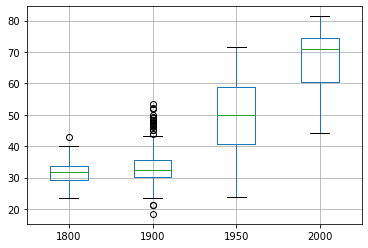

In [18]:
df.boxplot(column=['1800','1900','1950','2000'])

### Which countries has the highest life expectancy data now?

In [19]:
df['2020'].describe()

count    184.000000
mean      73.391304
std        6.813393
min       53.300000
25%       68.475000
50%       74.350000
75%       78.600000
max       85.300000
Name: 2020, dtype: float64

In [20]:
df_highest_countries = df[df['2020'] > 78.6]
df_highest_countries.head(10)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
8,Australia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,91.0,91.2,91.3,91.4,91.5,91.6,91.7,91.8,91.9,92.0
9,Austria,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,...,90.8,90.9,91.0,91.1,91.2,91.3,91.5,91.6,91.7,91.8
12,Bahrain,30.3,30.3,30.3,30.3,30.3,30.3,30.3,30.3,30.3,...,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2,89.3,89.4
16,Belgium,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.1,40.1,...,90.4,90.5,90.6,90.7,90.8,91.0,91.1,91.2,91.3,91.4
30,Canada,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,...,90.6,90.7,90.8,90.9,91.0,91.2,91.3,91.4,91.5,91.6
34,Chile,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,89.6,89.7,89.8,89.9,90.0,90.1,90.2,90.3,90.4,90.5
36,Colombia,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,91.0,91.1,91.2,91.3,91.4,91.5,91.7,91.8,91.9,92.0
40,Costa Rica,30.2,30.2,30.2,30.2,30.2,30.2,30.2,30.2,30.2,...,89.3,89.3,89.5,89.6,89.7,89.8,89.9,90.0,90.1,90.2
42,Croatia,36.1,36.1,36.1,36.1,36.1,36.1,36.1,36.1,36.1,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.2,89.3
44,Cyprus,38.5,38.5,38.5,38.5,38.5,38.5,38.5,38.5,38.5,...,90.9,91.0,91.1,91.2,91.3,91.4,91.5,91.6,91.7,91.8


We can see the top 10 countries with the highest life expectancy. These countries also count in the 

Now I would like to find the country which has the highest life expectancy above all.

In [21]:
df['2020'].max()

85.3

In [22]:
df['2020'].idxmax()

147

In [23]:
df_highest = df[df['2020'] >= df['2020'].max()]

In [24]:
df_highest

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
147,Singapore,29.1,29.1,29.1,29.1,29.1,29.1,29.1,29.1,29.1,...,93.7,93.8,93.9,94.0,94.2,94.3,94.4,94.5,94.6,94.7


Singapore has the highest life expentancy.

### Which countries has the lowest life expectancy data now?


In [25]:
df['2020'].describe()

count    184.000000
mean      73.391304
std        6.813393
min       53.300000
25%       68.475000
50%       74.350000
75%       78.600000
max       85.300000
Name: 2020, dtype: float64

In [26]:
df_lowest_countries = df[df['2020'] < 68.47]
df_lowest_countries.head(10)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9
18,Benin,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,...,77.6,77.7,77.9,78.0,78.1,78.3,78.4,78.5,78.7,78.8
26,Burkina Faso,29.2,29.2,29.2,29.2,29.2,29.2,29.2,29.2,29.2,...,77.2,77.3,77.5,77.6,77.7,77.8,78.0,78.1,78.2,78.4
27,Burundi,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5,31.5,...,76.8,77.0,77.1,77.2,77.4,77.5,77.7,77.8,78.0,78.1
29,Cameroon,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,78.3,78.4,78.5,78.7,78.8,79.0,79.1,79.2,79.3,79.5
32,Central African Republic,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,67.1,67.3,67.4,67.5,67.6,67.7,67.8,67.9,68.0,68.1
33,Chad,30.9,30.9,30.9,30.9,30.9,30.9,30.9,30.9,30.9,...,76.7,76.8,77.0,77.1,77.3,77.4,77.5,77.7,77.8,77.9
38,"Congo, Dem. Rep.",31.6,31.6,31.6,31.6,31.6,31.6,31.6,31.6,31.6,...,75.6,75.7,75.8,76.0,76.1,76.2,76.3,76.4,76.5,76.7
39,"Congo, Rep.",32.7,32.7,32.7,32.7,32.7,32.7,32.7,32.7,32.7,...,72.9,73.0,73.1,73.2,73.3,73.5,73.6,73.7,73.8,73.9


We can see the top 10 countries with the lowest life expectancy.

Now let's see which of these has the lowest numbers.

In [27]:
df_lowest = df[df['2020'] <= df['2020'].min()]

In [28]:
df_lowest

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
32,Central African Republic,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,...,67.1,67.3,67.4,67.5,67.6,67.7,67.8,67.9,68.0,68.1


The Central African Republic has the lowest life expentancy.

### Comparison between highest and lowest life expectancy

Let's see how do these compare visually. 

/Users/lilmac/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.02, 'Lowest life expectancy numbers in 2020')

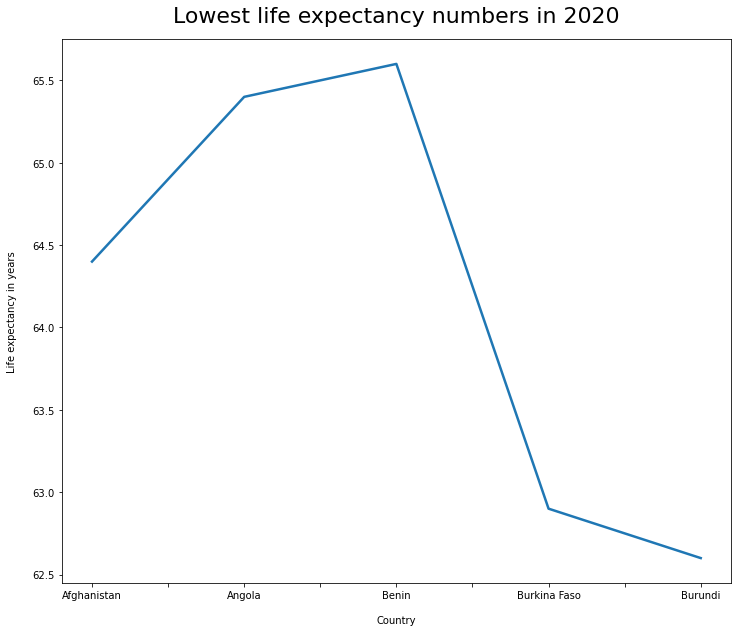

In [29]:
fig = df_lowest_countries.set_index('country')['2020'].head(5).plot(figsize=(12, 10), linewidth=2.5)
fig.set_xlabel("Country", labelpad=15)
fig.set_ylabel("Life expectancy in years", labelpad=15)
fig.set_title("Lowest life expectancy numbers in 2020", y=1.02, fontsize=22)

In [30]:
plot.scatter(df.df_lowest, df.df_highest)

NameError: name 'plot' is not defined

### How much did life expectancy grow in the last four decades on average?



In [31]:
df['1970'].mean()

60.042934782608675

In [32]:
df['1975'].mean()

61.82445652173914

In [33]:
df['1980'].mean()

63.61086956521739

In [34]:
df['1985'].mean()

64.89402173913045

In [35]:
df['1990'].mean()

66.09891304347828

In [36]:
df['1995'].mean()

66.39565217391304

In [37]:
df['2000'].mean()

67.40923913043478

In [38]:
df['2005'].mean()

68.77989130434781

In [39]:
df['2010'].mean()

70.43532608695652

In [40]:
df['2015'].mean()

72.12989130434781

In [41]:
df['2020'].mean()

73.39130434782608

Now let's see the growth in percentage.

In [42]:
 df[['1970','1975','1980','1985','1990','1995', '2000','2005','2010','2015','2020']].pct_change(axis='columns')

,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
0,NaN,0.010730,-0.063694,-0.038549,0.240566,0.013308,0.024390,0.051282,0.043554,0.021703,0.052288
1,NaN,0.043348,0.027221,0.009763,0.012431,0.017735,0.004021,0.014686,0.021053,0.005155,0.007692
2,NaN,0.034423,0.044925,0.093949,0.043668,0.016736,0.015089,0.017568,0.013280,0.010485,0.015564
4,NaN,0.015054,0.008475,0.006303,0.000000,0.033403,0.044444,0.077369,0.075404,0.056761,0.033175
5,NaN,0.023774,0.031930,0.026723,0.017808,-0.002692,0.008097,0.014726,0.010554,0.003916,0.006502
...,...,...,...,...,...,...,...,...,...,...,...
182,NaN,0.015083,0.031204,0.025937,0.012640,0.004161,0.022099,0.016216,0.001330,-0.003984,0.001333
183,NaN,0.136029,0.053398,0.032258,0.025298,0.018868,0.018519,0.013986,0.013793,0.010884,0.006729
184,NaN,0.157143,0.092593,0.064030,0.038938,0.037479,0.039409,0.041074,0.031866,0.008824,-0.005831
185,NaN,0.035185,0.001789,-0.025000,-0.071429,-0.090730,-0.002169,0.071739,0.135903,0.107143,0.037097


I would like to see the difference in this growth between the countries which have higher and lower numbers so I will separate this to both datasets.

In [43]:
 df_highest_countries[['1970','1975','1980','1985','1990','1995', '2000','2005','2010','2015','2020']].pct_change(axis='columns')

,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
8,NaN,0.021127,0.026207,0.014785,0.018543,0.016905,0.016624,0.021384,0.009852,0.006098,0.003636
9,NaN,0.017070,0.018182,0.019231,0.021563,0.013193,0.019531,0.016603,0.012563,0.011166,0.007362
12,NaN,0.047401,0.037956,0.007032,-0.015363,0.007092,0.022535,0.034435,0.041278,0.014066,0.007566
16,NaN,0.015493,0.016644,0.017735,0.018767,0.011842,0.011704,0.017995,0.011364,0.009988,0.012361
30,NaN,0.012380,0.021739,0.015957,0.011780,0.009056,0.015385,0.012626,0.014963,0.003686,0.007344
34,NaN,0.058637,0.046407,0.027182,0.019499,0.025956,0.023968,0.013004,0.008986,0.012723,0.006281
36,NaN,0.007576,0.037594,-0.014493,0.050000,0.008403,0.029167,0.031039,0.022251,0.024328,0.008750
40,NaN,0.042090,0.037604,0.018792,0.007905,-0.002614,0.020970,0.017972,0.001261,0.006297,0.001252
42,NaN,0.020498,0.015782,0.008475,0.015406,0.008276,0.019152,0.013423,0.017219,0.010417,0.018041
44,NaN,0.012640,0.023578,0.016260,0.012000,0.011858,0.000000,0.014323,0.028241,0.017478,0.008589


In [44]:
df_lowest_countries[['1970','1975','1980','1985','1990','1995', '2000','2005','2010','2015','2020']].pct_change(axis='columns')

,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
0,NaN,0.010730,-0.063694,-0.038549,0.240566,0.013308,0.024390,0.051282,0.043554,0.021703,0.052288
4,NaN,0.015054,0.008475,0.006303,0.000000,0.033403,0.044444,0.077369,0.075404,0.056761,0.033175
18,NaN,0.048936,0.040568,0.042885,0.031776,0.027174,0.014109,0.029565,0.037162,0.034202,0.033071
26,NaN,0.038202,0.047619,0.037190,0.011952,-0.005906,0.037624,0.055344,0.054250,0.041166,0.036244
27,NaN,0.011013,0.023965,0.027660,0.008282,-0.090349,0.013544,0.106904,0.162978,0.051903,0.029605
29,NaN,0.037255,0.037807,0.038251,0.012281,-0.025997,-0.024911,0.001825,0.051002,0.060659,0.049020
32,NaN,0.002114,0.025316,0.006173,-0.034765,-0.038136,-0.024229,0.020316,0.061947,0.060417,0.047151
33,NaN,0.040568,0.001949,0.021401,0.017143,-0.003745,-0.020677,0.028791,0.052239,0.049645,0.028716
38,NaN,0.025794,0.019342,0.030361,-0.007366,-0.007421,0.005607,0.039033,0.035778,0.058722,0.034258
39,NaN,0.045267,0.039370,0.035985,-0.016453,-0.029740,0.011494,0.066288,0.062167,0.040134,0.020900


<a id='conclusions'></a>
## Conclusions


As a summary, I would like to conclude that based on this data set, average life expentancy grew on a steady pace since the 1800s and as we can see, the projections shows that it will grow further in the future as well.

The results of my findings shows the top 10 countries with the highest and lowest life expectancy right now and how much their data grew in the last couple of decades.

I deliberately did not merge any other datasets into this one to not let myself make false correlations without further research or knowledge.

In [45]:
df.to_csv('s3://mybucket/dfs/somedf.csv'

SyntaxError: unexpected EOF while parsing (<ipython-input-45-65c38993cba7>, line 1)

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

